<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import os, sys, re
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.io as pio

# выводить все результаты вычислений в ячейках Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# подключить Latex
from IPython.display import Latex

# изменить формат вывода pandas
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_info_rows', 500)
# pd.set_option('display.max_info_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.large_repr', 'info')

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
data = pd.read_csv('./data/dst-3.0_16_1_hh_database.csv', sep=';')

# здесь и далее работаем с копией
hh_df = data.copy()                                                 
hh_df.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
hh_df.head(3)
# hh_df.tail(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [10]:
cols_full_percent = hh_df.notnull().mean() * 100
cols_with_null = cols_full_percent[cols_full_percent > 0].sort_values(ascending=False).round(3)
cols_with_null

Пол, возраст                       100.000
ЗП                                 100.000
Ищет работу на должность:          100.000
Город, переезд, командировки       100.000
Занятость                          100.000
График                             100.000
Образование и ВУЗ                  100.000
Обновление резюме                  100.000
Авто                               100.000
Последнее/нынешнее место работы     99.998
Последняя/нынешняя должность        99.996
Опыт работы                         99.625
dtype: float64

5. Выведите основную статистическую информацию о столбцах.


In [11]:
hh_df.describe(include=['object'])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

### 1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. 

Например:

* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…

Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак <font color='LightSeaGreen'>**"Образование"**</font>, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [4]:
# функция извлечения уровня образования
def get_education(arg):
    """ Функция извлекает уровень образования по шаблону с начала входной строки

    Args:
        arg (string): строка, содержащая информацию об уровне образования из признака 'Образование и ВУЗ'

    Returns:
        string: строка, содержащая уровень образования, преобразованный в одну из 4 категорий - высшее, 
                неоконченное высшее, среднее специальное или среднее
    """
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'

# создаём и удаляем признаки
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education)
hh_df.drop('Образование и ВУЗ', axis=1, inplace=True)

# проверка признака
hh_df['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

In [13]:
# ответ на задание 3.1
print(f"Средний уровень образования имеет: {hh_df['Образование'].value_counts().loc['среднее']} соискателей")

Средний уровень образования имеет: 559 соискателей


***

### 2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. 

Например:

* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака <font color='LightSeaGreen'>**"Пол"**</font> и <font color='LightSeaGreen'>**"Возраст"**</font>. При этом важно учесть:

* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина;
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [5]:
# функция извлечения пола
def get_sex(arg):
    """ Функция извлекает пол по шаблону с начала входной строки

    Args:
        arg (string): строка, содержащая информацию о поле и возрасте из признака 'Пол, возраст'

    Returns:
        string: строка, содержащая пол, преобразованный в одну из 2 категорий - М - мужчина или Ж - женщина
    """
    if 'Мужчина' in arg:
        return 'М'
    else:
        return 'Ж'

# функция извлечения возраста
def get_age(arg):
    """ Функция извлекает возраст по шаблону с начала входной строки

    Args:
        arg (string): строка, содержащая информацию о поле и возрасте из признака 'Пол, возраст'

    Returns:
        int: строка, содержащая возраст, количество полных лет
    """
    age = arg.split(sep=',', maxsplit=1)[1]
    age = int(age.split()[0])
    return age

# создаём и удаляем признаки
hh_df[['Пол', 'Возраст']] = hh_df['Пол, возраст'].agg([get_sex, get_age])
hh_df.drop(columns='Пол, возраст', inplace=True)

# проверка признаков
hh_df['Пол'].value_counts()
hh_df['Возраст'].value_counts()

М    36211
Ж     8533
Name: Пол, dtype: int64

30     2834
29     2765
28     2748
31     2675
27     2583
       ... 
15        2
77        1
76        1
14        1
100       1
Name: Возраст, Length: 63, dtype: int64

In [15]:
# ответ на задание 3.2
print(f"Доля резюме женщин среди соискателей: {round(hh_df['Пол'].value_counts(normalize=True).loc['Ж'] * 100, 2)}%")
print(f"Средний возраст соискателей: {round(hh_df['Возраст'].mean(), 2)} лет")

Доля резюме женщин среди соискателей: 19.07%
Средний возраст соискателей: 32.2 лет


***

### 3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем <font color='LightSeaGreen'>**"Опыт работы (месяц)"**</font>.

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. 

    Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

    Учитывайте эту особенность в вашем коде.

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [6]:
# функция преобразования признака 'Опыт работы'
def get_experience(arg):
    """ Функция извлекает опыт работы с начала входной строки

    Args:
        arg (string): строка, содержащая информацию о поле и возрасте из признака 'Опыт работы'

    Returns:
        int: строка, содержащая суммарный трудовой опыт в месяцах
    """
    if pd.isna(arg) or arg == 'Не указано':
        return None
    
    year_words = ['год', 'года', 'лет']
    month_words = ['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    if (arg_splitted[3] in year_words):
        if (len(arg_splitted) > 4) and (arg_splitted[5] in month_words):
            return int(arg_splitted[2]) * 12 + int(arg_splitted[4])
        return int(arg_splitted[2]) * 12
    return int(arg_splitted[2])

# создаём и удаляем признаки
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)
hh_df.drop(columns='Опыт работы', inplace=True)

# проверка признака
hh_df['Опыт работы (месяц)'].value_counts()

81.0     313
68.0     306
80.0     286
92.0     286
64.0     285
        ... 
517.0      1
526.0      1
556.0      1
473.0      1
622.0      1
Name: Опыт работы (месяц), Length: 517, dtype: int64

In [31]:
# ответ на задание 3.3
print(f"Медианный опыт работы составляет: {round(hh_df['Опыт работы (месяц)'].median())} мес.")

Медианный опыт работы составляет: 100 мес.


***

### 4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. 

В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам;
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам;
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам.

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак <font color='LightSeaGreen'>**"Город"**</font> должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
    <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.

* Признак <font color='LightSeaGreen'>**"Готовность к переезду"**</font> должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". 

    Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак <font color='LightSeaGreen'>**"Готовность к командировкам"**</font> должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных <font color='tomato'>*у некоторых соискателей "потерялась" информация о готовности к командировкам*</font>. Давайте, по умолчанию, <font color='tomato'>*будем считать, что такие соискатели не готовы к командировкам*</font>.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [7]:
# функция извлечения города
def get_city(arg):
    """ Функция извлекает город с начала входной строки

    Args:
        arg (string): строка, содержащая информацию из признака 'Город, переезд, командировки'

    Returns:
        string: строка, содержащая город, преобразованный в одну из 4 категорий - Москва, Санкт-Петербург, 
                город-миллионник или другие
    """
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
                        'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                        'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                        ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# функция оценки готовности к переезду
def get_ready_to_relocation(arg):
    """ Функция извлекает информацию о готовности к переезду / не готовности к переезду / переезду в другой город

    Args:
        arg (string): строка, содержащая информацию из признака 'Город, переезд, командировки'

    Returns:
        bool: строка, содержащая признак, преобразованный в одну из 2 категорий - True - готов к переездам, 
                False - не готов
    """
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

# функция для оценки готовности к командировкам
def get_ready_for_business_trips(arg):
    """ Функция извлекает информацию о готовности к командировкам / не готовности к командировкам / готовности 
        к редким командировкам

    Args:
        arg (string): строка, содержащая информацию о (не)/готовности к командировкам 'Город, переезд, командировки'

    Returns:
        bool: строка, содержащая признак, преобразованный в одну из 2 категорий - True - готов к переездам, 
                False - не готов
    """
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else: 
            return True
    # "потерянная" информация о готовности к командировкам, по умолчанию считаем, 
    # что такие соискатели не готовы к командировкам.
    else:
        return False

# создаём и удаляем признаки
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_ready_to_relocation)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_ready_for_business_trips)
hh_df.drop(columns='Город, переезд, командировки', inplace=True)

# проверка признаков
hh_df['Город'].value_counts().sort_index()
hh_df['Готовность к переезду'].value_counts().sort_index(ascending=False)
hh_df['Готовность к командировкам'].value_counts().sort_index(ascending=False)

Москва              16621
Санкт-Петербург      4937
город-миллионник     7332
другие              15854
Name: Город, dtype: int64

True     16025
False    28719
Name: Готовность к переезду, dtype: int64

True     31640
False    13104
Name: Готовность к командировкам, dtype: int64

In [33]:
# ответ на задание 3.4
print(f"Доля соискателей проживающих в Санкт-Петербурге: "\
        f"{round(hh_df['Город'].value_counts(normalize=True).loc['Санкт-Петербург']*100)}%")

mask_ready_to_relocation = hh_df['Готовность к переезду']
mask_ready_for_business_trips = hh_df['Готовность к командировкам']
print(f"Доля соискателей готовых к переезду и командировкам составляет: "\
        f"{round(hh_df[mask_ready_to_relocation & mask_ready_for_business_trips].shape[0] / hh_df.shape[0]*100)}%")

Доля соискателей проживающих в Санкт-Петербурге: 11%
Доля соискателей готовых к переезду и командировкам составляет: 32%


***

### 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:

* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется *One Hot Encoding* и его схема представлена на рисунке ниже:

<center>
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
</center>

Выполните данное преобразование для признаков **"Занятость"** и **"График"**, ответьте на контрольные вопросы, после чего удалите их из таблицы.

In [8]:
# создаём признаки-мигалки
employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for str in employment:
    hh_df[str.capitalize()] = hh_df['Занятость'].agg(lambda x: True if str in x else False)
    
for str in schedule:
    hh_df[str.capitalize()] = hh_df['График'].agg(lambda x: True if str in x else False)

# удаляем признаки
hh_df.drop(columns=['Занятость', 'График'], inplace=True)

# проверка признаков
for str in employment:
    hh_df[str.capitalize()].value_counts().sort_index(ascending=False)

for str in schedule:
    hh_df[str.capitalize()].value_counts().sort_index(ascending=False)

True     43284
False     1460
Name: Полная занятость, dtype: int64

True     13136
False    31608
Name: Частичная занятость, dtype: int64

True      8068
False    36676
Name: Проектная работа, dtype: int64

True       486
False    44258
Name: Волонтерство, dtype: int64

True      2804
False    41940
Name: Стажировка, dtype: int64

True     41716
False     3028
Name: Полный день, dtype: int64

True     12725
False    32019
Name: Сменный график, dtype: int64

True     15584
False    29160
Name: Гибкий график, dtype: int64

True     15022
False    29722
Name: Удаленная работа, dtype: int64

True      3084
False    41660
Name: Вахтовый метод, dtype: int64

In [35]:
# ответ на задание 3.5
mask_project_work = hh_df['Проектная работа'] == True
mask_volunteer_work = hh_df['Волонтерство'] == True
print(f"Среди соискателей проектную работу или волонтёрство ищут: "\
        f"{hh_df[mask_project_work & mask_volunteer_work].shape[0]} чел.")

mask_rotational_basis = hh_df['Вахтовый метод'] == True
mask_flexible_shifts = hh_df['Гибкий график'] == True
print(f"Среди соискателей работу вахтовым методом или с гибким графиком ищут: "\
        f"{hh_df[mask_rotational_basis & mask_flexible_shifts].shape[0]} чел.")

Среди соискателей проектную работу или волонтёрство ищут: 436 чел.
Среди соискателей работу вахтовым методом или с гибким графиком ищут: 2311 чел.


***

### 6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 

В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например [pycbrf](https://github.com/idlesign/pycbrf). Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**.

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "*currency*" - наименование валюты в ISO кодировке,
* "*date*" - дата, 
* "*proportion*" - пропорция, 
* "*close*" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют.

>Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.

Воспользуйтесь этой информацией в ваших преобразованиях.

<center>
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>
</center>

Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак <font color='LightSeaGreen'>**"ЗП (руб)"**</font> - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [9]:
# считываем таблицу с данными по обмену валюты
rates = pd.read_csv('./data/ExchangeRates.csv', sep=',')

# переводим даты в формат datetime и отбрасываем время
rates['date'] = pd.to_datetime(rates['date']).dt.date
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date

# функция перевода валюты в стандарт ISO
def get_salary_сurrency(arg):
    """ Функция считывает наименование валюты и возвращает наименование по международному стандарту

    Args:
        arg (string): cтрока, содержащая наименование валюты
    
    Returns:
        string: cтрока, содержащая значение, в соответствии с ключом из словаря
    """
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT', 'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN'
    }
    currency = arg.split(' ')[1].replace('.', '')
    if currency == 'руб':
        return 'RUB'
    else:
        return currency_dict[currency]

# выделяем из признака 'ЗП' сумму и валюту как временные признаки
hh_df['ЗП (tmp)'] = hh_df['ЗП'].apply(lambda x: x.split(' ')[0]).astype(float)
hh_df['Валюта (tmp)'] = hh_df['ЗП'].apply(get_salary_сurrency)

# объединяем оба DataFrame
merged_df = hh_df.merge(
    rates,
    how='left',
    left_on=['Валюта (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date'],
)

# заполняем столбец close и proportion значением 1
merged_df['close'] = merged_df['close'].fillna(1)
merged_df['proportion'] = merged_df['proportion'].fillna(1)

# приведение признака к единой валюте - рубль
hh_df['ЗП (руб)'] = merged_df['close'] * merged_df['ЗП (tmp)'] / merged_df['proportion']

# удаляем признаки
hh_df = hh_df.drop(['ЗП', 'ЗП (tmp)', 'Валюта (tmp)'], axis=1)

# проверка признака
hh_df['ЗП (руб)'].head()

0     29000.0
1     40000.0
2     20000.0
3    100000.0
4    140000.0
Name: ЗП (руб), dtype: float64

In [37]:
# ответ на задание 3.6
print(f"Медианная заработная плата соискателей составляет: {round(hh_df['ЗП (руб)'].median() / 1000)} тыс. руб.")

Медианная заработная плата соискателей составляет: 59 тыс. руб.


# Исследование зависимостей в данных

### 1. Постройте распределение признака **"Возраст"**. 

Опишите распределение, отвечая на следующие вопросы: 
* Чему равна мода распределения, 
* Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?
* Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [76]:
fig_hist = px.histogram(
    data_frame=hh_df,
    x='Возраст',
    histnorm='percent',
    width=1000,
    height=500,
    marginal='box',
)

fig_hist.update_layout(
    title='Распределение соискателей по возрасту',
    title_x=0.5,
    xaxis=dict(
        title='Возраст соискателей, лет',
        range=[1e1 + 2, 1e2 + 2],
    ),
    yaxis=dict(
        title='Доля соискателей, в %',
    ),
)

# fig_hist.show()

pio.write_image(fig_hist, file='./images/fig_hist_1.svg', engine='orca')

![Alt text](./images/fig_hist_1.svg)

In [38]:
# ответ на задание 4.1
print(f"Модальное значение возраста соискателей: {hh_df['Возраст'].mode().loc[0]} лет")

Модальное значение возраста соискателей: 30 лет


#### **Выводы:**

1. Распределение возраста соискателей, весьма, близко к нормальному распределению с ассиметрией вправо.

2. Модальным значением является возраст 30 лет.

3. Минимальное и максимальное значения признака 'Возраст' составляют 14 и 100 лет, соответственно.

4. Возраст большинства соискателей находится в интервале от 27 до 36 лет, больше 23000 тыс. чел. Если принять за точку отсчета пороговую границу в 250 человек на каждую возрастную группу, то возрастная выборка расширится с 20 до 49 человек, а это 95.47% соискателей, почти 43000 тысячи человек.

5. На распределении наблюдается единственное аномальное значение - это соискатель с возрастом 100 лет, сохранить трудоспособность в 100 лет является, весьма, непростой задачей, хотя, всё индивидуально. В настоящее время, много людей продолжают работать и при достижении пенсионного возраста, как мой отец. Как показывает выборка, люди старше 57 лет составляют 0.867%, такие соискатели есть, это нередкие случаи, считать их аномалией, по моему мнению, не стоит. Не смотря на то, что их количество совсем невелико, работодателю потребуется частный подход к каждому и предстоит решить стоят ли временнЫе затраты того или нет, чтобы найти подходящего соискателя с реальным подтвержденным опытом.

6. В выборке присутствуют совсем юные соискатели - по ТК РФ устроится на работу можно с 14 лет, с согласия родителей и муниципального органа опеки. В аномалии не входят значения от 14 и до 18, несмотря единичные значения, здорово видеть, когда люди такого возраста стремятся обрести независимость и самостоятельность, возможно, есть факторы личного характера или обстоятельств в семье, но это отдельная тема исследований.

***

### 2. Постройте распределение признака **"Опыт работы (месяц)"**. 

Опишите данное распределение, отвечая на следующие вопросы: 
* Чему равна мода распределения? 
* Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? 
* Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [74]:
fig_hist = px.histogram(
    data_frame=hh_df,
    x='Опыт работы (месяц)',
    histnorm='percent',
    width=1000,
    height=500,
    marginal='box',
)

fig_hist.update_layout(
    title='Распределение соискателей по опыту работы',
    title_x=0.5,
    xaxis=dict(
        range=[-2.5e1, 1.2e3 + 2.5e1],
    ),
    yaxis=dict(
        title='Доля соискателей, в %',
    ),
)

# fig_hist.show()

pio.write_image(fig_hist, file='./images/fig_hist_2.svg', engine='orca')

![Alt text](./images/fig_hist_2.svg)

In [156]:
# ответ на задание 4.2
print(f"Максимальный опыт работы большинства соискателей: {hh_df['Опыт работы (месяц)'].mode().loc[0]} мес.")

Максимальный опыт работы большинства соискателей: 81.0 мес.


#### **Выводы:**

1. Опыт работы, также, весьма, близко к нормальному распределению с ассиметрией вправо.

2. Мода распределения опыт работы находится в интервале от 80 до 84 месяцев, если быть точнее - 81 месяц.

3. Минимальное и максимальное значения признака составляют 1 и 1188 месяцев, соответственно.

4. "Вилка" опыта работы большинства соискателей находится в диапазоне от 1 до 300 месяцев. Межквартильный диапазон составляет от 57 до 154 месяцев.

5. На распределении наблюдается одна интересная аномалия 1188 месяцев. Таких "бессмертных" соискателей, скорее всего, не существует, если только он не является частью команды, частью корабля. © "Тебя ждет 100 лет службы на корабле Дейви Джонса!"

6. Есть интересные пики-скачки, начиная с 35-39, 70-74, пик на 80-84 - похоже на классическое "выгорание" от работы на одном месте с последующим падением до 120, далее - ступенька 155-159, 180-184 мес. и далее, всё похоже на цикл работы по "3 года на одном месте" и дальнейшая смена работы. Данное распределение - "живое" подтверждение тезиса "работа живёт 3 года".

***

### 3. Постройте распределение признака **"ЗП (руб)"**. 

Опишите данное распределение, отвечая на следующие вопросы: 
* Каковы предельные значения признака? 
* В каком примерном интервале находится заработная плата большинства соискателей? 
* Есть ли аномалии для признака возраста? 

Обратите внимание на гигантские размеры желаемой заработной платы.

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [73]:
fig_hist = px.histogram(
    data_frame=hh_df,
    x='ЗП (руб)',
    histnorm='percent',
    width=1000,
    marginal='box'
)

fig_hist.update_layout(
    title='Распределение желаемой заработной платы соискателей',
    title_x=0.5,
    yaxis=dict(
        title = 'Доля соискателей, в %',
    ),
    xaxis=dict(
        title='Заработная плата, руб.',
        range=[-1e4, 5e5 + 1e4],
    ),
)

# fig_hist.show()

pio.write_image(fig_hist, file='./images/fig_hist_3.svg', engine='orca')

![Alt text](./images/fig_hist_3.svg)

In [159]:
# ответ на задание 4.3
print(f"Соискателей желающих заработную плату выше 1 миллиона рублей: "\
        f"{hh_df[hh_df['ЗП (руб)']> 1000000]['ЗП (руб)'].count()} чел.")

Соискателей желающих заработную плату выше 1 миллиона рублей: 5 чел.


#### **Выводы:**

1. Полученное распределение сложно назвать нормальным, на гистограмме видны многочисленные выбросы.

2. Мода распределения желамого заработка составляет 50 тыс. рублей.

3. Минимальное и максимальное значения признака желаемой заработной платы составляют 1 рубль и более 24 млн. рублей в месяц, соответственно. Я не верю, что в современном мире кто-то работает за еду, может, он, конечно, акционер-миллионер с заработной платой в 1 рубль и уходит таким образом от налогов (как Стив Джобс), не добрый же самаритянин он, в конце концов, всем нужно жить и кушать.

4. "Вилка" желаемой заработной платы большинства соискателей лежит в интервале от 2.5 до 150 тыс. рублей, межквартильный интервал составляет от 37 до 95 тысяч рублей.

5. Так какие данные на графике являются аномальными или ошибочными? 

    * Наиболее вероятно, что сумма в 24.3 миллиона рублей является ошибочной, в виду пересчета при переводе из USD в RUB, скорее всего, указали в иностранной валюте USD, ориентируясь на валюту RUB, сумма в 380 тыс. рублей для специалиста информационно-технического профиля вполне реальна. 

    * Зарплата свыше 1 млн. рублей в месяц обычно характерна для топ-менеджмента, но, вряд ли, их нанимают через ХХ.ру. Исходя из распределения, суммы от 1 млн. руб., таких соискателей всего 0.013%, думаю, что их можно отнести к ошибочным или содержащим значительный процент ошибочных данных.

7. Кажется странным указание желаемой заработной платы около прожиточного минимума, условно, ниже 17.5 тыс. руб. Но, если принимать во внимание, что график работы может быть меньше стандартной рабочей недели или есть возможность работать только на полставки, например, это может быть совмещение, учащиеся средней школы, возможно, новички "без опыта" или пенсионеры. Таких немало, больше 1000 человек, в процентном отношении - 2.324%

***

### 4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). 

Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

Сделайте выводы по представленной диаграмме: 
* Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? 
* Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

In [67]:
mask_salary_lower_1M = hh_df['ЗП (руб)'] < 1e6+1
bar_data = hh_df[mask_salary_lower_1M]\
    .groupby(by=['Образование', 'Пол'], as_index=False)['ЗП (руб)'].median(numeric_only=True)

fig_box = px.box(
    data_frame=hh_df[mask_salary_lower_1M],
    x='Образование',
    y='ЗП (руб)',
    range_y=[-5e3, 2.5e5],
    color_discrete_sequence=['RoyalBlue', 'DeepPink', ],
    color=hh_df[mask_salary_lower_1M]['Пол'].map({'Ж': 'Женщины', 'М': 'Мужчины'}),
    category_orders={'Образование':['среднее', 'среднее специальное', 'неоконченное высшее', 'высшее']},
    width=1000,
    height=500,
)

fig_box.update_layout(
    title='Распределение медианной желаемой заработной платы по уровню образования в разрезе пола',
    title_x=0.5,
    showlegend=True,
    legend_title='Пол',
    yaxis=dict(
        title='Заработная плата, руб.',
    ),
    xaxis=dict(
        title='Уровень образования',
    ),
)

fig_bar = px.bar(
    data_frame=bar_data,
    barmode='group',
    x='Образование',
    y='ЗП (руб)',
    color='Пол',
    text=bar_data['Пол'].map({'Ж': 'Женщины', 'М': 'Мужчины'}),
    color_discrete_sequence=['DeepPink', 'RoyalBlue', ],
    category_orders={'Образование':['среднее', 'среднее специальное', 'неоконченное высшее', 'высшее']},
    width=1000,
    height=500,
)

fig_bar.update_layout(
    title='Распределение медианной желаемой заработной платы по уровню образования в разрезе пола',
    title_x=0.5,
    showlegend=False,
    legend_title='Пол',
    xaxis=dict(
        title='Уровень образования',
    ),
    yaxis=dict(
        title = 'Заработная плата, руб.',
    ),
)

# fig_box.show()
# fig_bar.show()

pio.write_image(fig_box, file='./images/fig_box_4.svg', engine='orca')
pio.write_image(fig_bar, file='./images/fig_bar_4.svg', engine='orca')

![Alt text](./images/fig_box_4.svg)
![Alt text](./images/fig_bar_4.svg)

#### **Выводы:**
1. Самый высокий уровень медианной желаемой заработной платы (почти 70 тыс. руб.) и самый большой разброс у соискателей с высшим образованием - мужчины. Люди с высшим образованием ценятся больше, это естественно, разброс, скорее всего, указывает на некоторый дефицит, что обусловлено востребованностью специфических навыков, соискатели тоже мониторят рынок и оценивают себя исходя из картины рынка трудовых ресурсов. Следует сконцентрировать и акцентировать внимание при анализе рынка и специализаций соискателей с высшим образованием.

2. Самый низкий уровень (40 тыс. руб.) и самый узкий разброс заработной платы у соискателей со средне-специальным образованием. Данная тенденция, наиболее вероятно, связана с конкуренцией на рынке труда - рынок насыщен и стоимость рабочей силы приблизилась к равновесной цене, об этом можно судить по межвартильному размаху, границы "коробок" равноудалены друг от друга, и у мужчин, и у женщин.

3. Особенно выделяется категория соискателей со средним образованием, это выпускники школ, и медиана, и межквартильные размахи больше, чем в категории средне-специальным образованием. Это может говорить только об одном, данная категория молодого контингента только вступает в трудовые отношения и, или это завышенные амбиции, или переоценённость самих себя. Надеюсь, что они быстро поймут, что в их положении - рынок труда диктует условия и им придётся их принять, или доказать, что они этого достойны. В своей практике, работая в образовательной сфере инженером по ИТ замечал, что запросы у ещё невыпустившихся студентов выше минимум на 25-30% от уровня моей заработной платы на рабочем месте, и это было средне-специальное образование, что они получали, параллели, по аналогии, из данного распределения - среднее образование.

4. Если дополнительно рассмотреть распределение в разрезе признака пола, то следует отметить тенденцию женщин указывать меньшую заработную плату, чем у мужчин с таким же уровнем образования. Возможно, данную тенденцию можно объяснить нежеланием или фобией работодателя брать на работу женщин из-за повышенных социальных обязательств, связанных с декретными отпусками по ТК РФ.

5. Самое интересное, в группе высшего образования есть пара соискательниц, у которых требования весьма не промах - запросы выше, чем у мужчин, оно и понятно, женщины-карьеристки всегда хотят выглядеть привлекательнее соперников (любого пола), причем, во всех смыслах. К ним, я бы особо присмотрелся, сильные женщины, гордость берёт за прекрасный пол =) (лучше бы оказались не аномалиями).

6. Уровень образования, несомненно, является важным признаком при прогнозировании желаемой зарплаты соискателей, при их поиске и хантинге.

***

### 5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). 

Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.

Сделайте выводы по полученной диаграмме: 
* Как соотносятся медианные уровни желаемой заработной платы и их размах в городах? 
* Как вы считаете, важен ли признак города при прогнозировании заработной платы?

In [70]:
mask_salary_lower_1M = hh_df['ЗП (руб)'] < 1e6+1
bar_data = hh_df[mask_salary_lower_1M]\
    .groupby(by=['Город', 'Пол'], as_index=False)['ЗП (руб)'].median(numeric_only=True)

fig_box = px.box(
    data_frame=hh_df[mask_salary_lower_1M],
    x='Город',
    y='ЗП (руб)',
    range_y=[-5e3, 3.5e5],
    color_discrete_sequence=['RoyalBlue', 'DeepPink', ],
    color=hh_df[mask_salary_lower_1M]['Пол'].map({'Ж': 'Женщины', 'М': 'Мужчины'}),
    category_orders={'Город':['другие', 'город-миллионник', 'Санкт-Петербург', 'Москва']},
    width=1000,
    height=500,
)

fig_box.update_layout(
    title='Распределение медианной желаемой заработной платы от города проживания в разрезе пола',
    title_x=0.5,
    showlegend=True,
    legend_title='Пол',
    yaxis=dict(
        title = 'Заработная плата, руб.',
    ),
)

fig_bar = px.bar(
    data_frame = bar_data,
    barmode='group',
    x='Город',
    y='ЗП (руб)',
    color='Пол',
    text=bar_data['Пол'].map({'Ж': 'Женщины', 'М': 'Мужчины'}),
    color_discrete_sequence=['DeepPink', 'RoyalBlue', ],
    category_orders={'Город':['другие', 'город-миллионник', 'Санкт-Петербург', 'Москва']},
    width=1000,
    height=500,
)

fig_bar.update_layout(
    title='Распределение медианной желаемой заработной платы от города проживания в разрезе пола',
    title_x=0.5,
    showlegend=False,
    legend_title='Пол',
    yaxis=dict(
        title='Заработная плата, руб.',
    ),
)

# fig_box.show()
# fig_bar.show()

pio.write_image(fig_box, file='./images/fig_box_5.svg', engine='orca')
pio.write_image(fig_bar, file='./images/fig_bar_5.svg', engine='orca')

![Alt text](./images/fig_box_5.svg)
![Alt text](./images/fig_bar_5.svg)

#### **Выводы:**

1. Соотношение запросов по желаемой заработной плате у мужчин и женщин в разных городах сохраняется - у мужчин они выше. Так как они являются добытчиками, по сути, по природе, исходя из природных инстинктов, и по призванию, такова сложившаяся тенденция и традиция в сегодняшнем обществе, мужчина - добытчик, женщина - уют дома. Разница соотношений у мужчин и женщин в городах категории "другие" и "город-милионник" составляет 30% и 20%, в федеральных городах - 25% и 30%. В целом, можно сказать, что запросы мужчин больше, более чем на 25% по сравнению с женщинами. 

2. На распределении заметно выделяются "другие" города, где запросы у обоих полов вызывают перевес, даже, в городах-милионниках, тут возможны несколько причин:
    * Стремление переехать в более крупный город;

    * Жизненные обстоятельства, смена семейного положения и состояния;

    * Абмиции молодых специалистов-выпускников;

2. В Москве желанная медианная заработная плата составляет 90 тыс. руб. (у мужчин), что в 2 раза больше, чем по остальным России (кроме Санкт-Петербурга - 1.5 раза). Разброс "в пределах усов" по максимальной заработной плате больше почти в 2.5-3 раза - почти 300 тыс. руб.

3. Санкт-Петербург занимает 2 место по медианной заработной плате - составляющей 60 тыс. руб. и разбросу - 150 тыс. руб.

4. Москва - очень перенаселённый город и проживание в нем стоит дороже, чем в остальной части России, таковы сегодняшние реалии. Условия проживания, определенно, оказывают влияние на уровень желаемой заработной платы и стремлением многих повысить уровень качества жизни, проживая в столице. Признак "заработная плата" является важным и неотъемлемым признаком, влияющим на качество прогнозов при построении выводов.

***

### 6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. 

Проанализируйте график, сравнив уровень заработной платы в категориях.

In [30]:
bar_data = hh_df\
    .groupby(['Готовность к командировкам', 'Готовность к переезду'], as_index=False)['ЗП (руб)'].median()

fig_bar = px.bar(
    data_frame=bar_data,
    x='ЗП (руб)',
    y='Готовность к переезду',
    barmode='group',
    width=1000,
    color='Готовность к командировкам',
    orientation='h',
    text=['Без переездов и командировок', 'Только переезд', 'Только командировки', \
            'Готов рассматривать переезд и командировки'],
)

fig_bar.update_layout(
    title='Зависимость медианной заработной платы от готовности к переездам и командировкам',
    title_x=0.5,
    xaxis=dict(
        title='Заработная плата, руб.',
    ),
)

# fig_bar.show()

pio.write_image(fig_bar, file='./images/fig_bar_6.svg', engine='orca')

![Alt text](./images/fig_bar_6.svg)

#### **Выводы:**

1. Готовность к переезду и командировкам существенно повышает уровень заработной платы. Наиболее высокие заработные платы у людей, готовых к переезду и командировкам - медианное значение 66 тыс. руб. Командируемые - это, как правило, люди, занимающие высокие должности, топ-менеджеры, руководители, поэтому такая связь, вполне, объясняет распределение.

2. Наименьшая медианная заработная плата - у неготовых и к тому, и к другому, медианное значение - 40 тыс. руб.

3. Разница в желаемой заработной плате между соискателями готовыми к переездам и командировкам и соискателями не желающими переезжать и ездить по командировкам составляет порядка 26 тыс. руб., разница достигает более 50%. Существенная прибавка, если учесть, что это, всего лишь, медиана, реальные цифры показывают более высокие значения, исходя из ранее рассмотренных графиков.

4. С точки зрения соискателей, готовность к командировкам стоит больше, чем готовность к переезду - разница в медианных значениях достигает цифры  10 тыс. руб., порядка 20%. Тоже, весьма, существенная разница, наверное, стоит согласиться за столь немалую прибавку, это, ведь, такие же, рабочие часы. Хотя здесь все зависит не только от командируемого, причин может быть масса:

    * Физиологические ограничения (травмы, возраст);

    * Нежелание тратить время не разъезды, когда вопросы можно решить удаленно (время на поездку, порой может быть больше, чем время, затраченное на решение вопроса);

    * Погодные условия (объём осадков, влажность, температура);

***

### 7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). 

На полученной сводной таблице постройте **тепловую карту**. 

Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# отсеиваем аномального старца, который несколько "смазывает картину"
mask_age = hh_df['Возраст'] < 100
education_age_df = hh_df[mask_age]

# index = 
pivot = education_age_df.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    ).reindex(
        labels=['высшее', 'неоконченное высшее', 'среднее специальное', 'среднее'], 
)

fig_heat = px.imshow(
    pivot,
    width=1000,
    aspect='auto',
    color_continuous_scale='turbo',
    labels={'x':'Возраст соискателей, лет', 'y':'Уровень образования', 'color':'Заработная плата'},
)

fig_heat.update_layout(
    title='Распределение медианной желаемой заработной платы от возраста и уровня образования',
    title_x=0.5,
)

# fig_heat.show()

pio.write_image(fig_heat, file='./images/fig_heat_7.svg', engine='orca')

![Alt text](./images/fig_heat_7.svg)

#### **Выводы:**

1. На диаграмме проявились новые аномалии: например, соискатели с высшим образованием в возрасте 16 лет, и со средне-специальным образованием и пенсионным возрастом 67 лет с требованием зарплаты в 120 тыс. руб. К единственному 17-летнему молодому девелоперу со стажем почти 3 года стажа (по заработной плате - запросы на уровень миддла) вопросы отпадают, а старшее поколение вопросов вызывает ещё меньше, хотя образование среднее и средне-специальное, только значительным опытом можно обьяснить запрашиваемую сумму.

2. На всех 4 категориях уровня образования наблюдается равномерное увеличение желаемой заработной платы от 18 до 40 лет и некоторое уменьшение приближаясь к пенсионному возрасту. 

3. Интересные наблюдения в виде групп-"волн" у соискателей с точки зрения зарплатных ожиданий:
    
    * с высшим образованием визуально наблюдается примерно 4 крупных "волны" - до 41-42 лет, до 59 лет, до 69 лет и до 77. Каждая "волна", пиковые значения больше предыдущих, заметно, что люди с высшим образованием имеют преимущество (зарплатные запросы выше, чем в других категориях), а вот 4 волна меньше третьй, но, всё ещё, достаточно высокая. Соискатели с высшим образованием сохраняют работоспособность до глубокой старости, при этом стремятся поддерживать уровень своего благосостояния на высоком уровне, сравнимым с 30-35-летними соискателями идентичного уровня образования.

    * с неоконченным высшим образованием, 2 крупных "волны" и одна поменьше, и далее совсем на спад. Мне видится, здесь есть доля неуверенности у соискателей (возможно, отказы со стороны HR), резко обрывается возрастная линейка, заметно по последней "волне", запрос по зарплатным ожиданиям ниже, чем в других категориях.

    * cо средним и средне-специальным образованием, у них очень много общего - много частых "волн" с небольшими пиками. Самое показательное, что соискатели со средним образованием - их запросы на повышенную заработную плату проявляются заметно раньше, чем в параллельной группе - соискатели со средне-специальным образованием - они знают, на что можно рассчитывать, отсюда и запросы, более скромные, рыночные, рост запросов происходит медленнее и позднее, рост зарплатных ожиданий растянут по времени. Пенсионер со средним образованием, запрашивая з/п в 120 тыс. руб. должен иметь не только амбиции и желания.

4. Наибольшая интенсивность увеличения заработной платы и наиболее плавная наблюдается у соискателей с высшим образованием, для соискателей с высшим образованием прослеживается чёткая тенденция - с увеличением возраста увеличивается медианная заработная плата, иными словами, можно сказать, что для данной группы наблюдается карьерный рост, а самая низкая интенсивность роста заработной платы у соискателей со средне-специальным образованием.

4. Во всех 4 категориях образования наблюдается наибольшая неравномерность в желаемой заработной плате в возрасте от 50 до 65, а у соискателей с высшим образованием до 75 лет. Высокие заработные платы для соискателей данных возрастных групп могут быть обусловлены наличием уникальных навыков и знаний, что указывает на потребность дополнительного анализа рынка труда по специализации для лиц с высшим и неоконченным высшим образованием.

***

### 8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). 

Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [41]:
scatter_df = hh_df.copy()
scatter_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'].agg(lambda x: round(x / 12, 2))

fig_scatt = px.scatter(
    data_frame=scatter_df,
    range_x=[-2, 102],
    range_y=[-5, 105],
    x='Возраст',
    y='Опыт работы (год)',
    width=1000,
    height=500,
)

fig_scatt.add_scatter(
    x=[0, 100],
    y=[0, 100],
    mode='lines',
    line_color='red',
    showlegend=False,
)

fig_scatt.add_scatter(
    x=[14, 100],
    y=[0, 86],
    mode='lines',
    line_color='orange',
    showlegend=False,
)

fig_scatt.update_layout(
    title='Зависимость опыта работы соискателей от возраста',    
    title_x=0.5,
    yaxis=dict(
        title='Опыт работы, лет',
    ),
    xaxis=dict(
        title='Возраст соискателей, лет',
    ),
)

# fig_scatt.show()

pio.write_image(fig_scatt, file='./images/fig_scatt_8.svg', engine='orca')

![Alt text](./images/fig_scatt_8.svg)

#### **Выводы:**

1. На диаграмме проявились аномальные / ошибочные данные - при масштабировании обласей выявлено 7 точек лежащих на границе области, где опыт работы больше возраста и над ней.

2. Весь охват выше красной линии объединяет только одно - опыт работы превышает возраст, хммм, интересно, ещё не родился, а отсчёт по опыту уже пошёл. Аномалии, к удалению.

3. К аномалиям следует отнести и точку с возрастом 100 лет и стажем 2,5 года. Даже, если это достоверная информация её можно считать единичным выбросом и можно смело исключить, на результаты "модели" повлияет только в лучшую сторону.

4. Некоторые данные выше оранжевой линии также вызывают вопросы - возраст и опыт с разницей 10-15-20 лет, к этим данным, я бы, тоже, отнёсся с особой осторожностью и вниманием, и, исключил бы, *опыт равен больше половины возраста*.

***

### **Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


### 9. Диаграмма распределения соискателей по городам с типом занятости "удаленная работа"

In [108]:
schedule = ['Полный день', 'Удаленная работа', 'Гибкий график', 'Вахтовый метод', 'Сменный график']
mask_1 = hh_df['Полный день']==True
mask_2 = hh_df['Удаленная работа']==True
mask_3 = hh_df['Гибкий график']==True
mask_4 = hh_df['Вахтовый метод']==True
mask_5 = hh_df['Сменный график']==True

fig_sun = px.sunburst(
    hh_df,
    color='Пол',
    path=['Город', 'Пол', 'Удаленная работа', ],
    height=800,
    width=1000,
    color_discrete_map={'Ж':'DeepPink', 'М':'RoyalBlue', },
    title='Соотношение соискателей по городам с типом занятости "удаленная работа" среди мужчин и женщин',
)

# формирование меток в секторах
fig_sun.data[0].insidetextorientation='horizontal'                  # горизонтальное расположение надписей в секторах
fig_sun.data[0].hovertemplate = '%{label}<br>%{value}'              # формирование подписей в контекстной подсказке
fig_sun.data[0].texttemplate = '%{label}<br>%{percentEntry:.2%}'    # формирование формата вывода

# fig_sun.show()

pio.write_image(fig_sun, file='./images/fig_sun_9.svg', engine='orca')

![Alt text](./images/fig_sun_9.svg)

#### **Выводы:**

1. Для всех городов наблюдается, примерно, одинаковое соотношение желающих работать по удалённому режиму работы - около ${}^1/_3$ соискателей в разрезе обоих полов.

2. Мужчин, выбирающих удалённый режим работы:

    * Москва, 31.91%
    * Санкт-Петербург, 35.19%
    * город-миллионник, 34.15% 
    * город - категория "другие", 36.29%
    
<p style="margin-left: 40px">Отчетливо прослеживается желание мужчин перебраться в более крупный город (миллионник или федерального назначения), ведь, отработав навыки удалённо, можно попробовать свои силы за серъезную прибавку к заработной плате. Далее следует Санкт-Петербург готов принять каждого, кому по силам испытать ритм большого города. Города-миллионники не сильно отстают от второго места и сильный пол готов принять участие в такой гонке. Москва - город больших возможностей, низкая цифра свидетельствует о том, что те, кто достиг желаемого уровня, либо особо не стремятся к удалёнке, либо она им уже не нужна (топ-менеджмент, руководители).</p>

3. Женщин, выбирающих удалённый режим работы:

    * Москва, 28.78%
    * Санкт-Петербург, 33.79%
    * город-милионник, 31.29% 
    * город - категория "другие", 32.01%
    
<p style="margin-left: 40px">Картина в целом похожа, также города под номерами 1 и 2, Санкт-Петербург и категория "другие", соответственно. Женщины менее склонны к карьеризму, но как показывает выборка соискателей с hh.ru - с сильными женщинами не всё так однозначно. Города-миллионники также не сильно отстают и занимают почётное 3 место, предположу, что это также всё связано с желанием выбраться в "большой город", стать его "частичкой". Москва замыкает тройку, причины, как минимум те же, те, кто достиг желаемого уровня, либо особо не стремятся к удалёнке, либо она им уже не нужна (топ-менеджмент, руководители).</p>

4. Из диаграммы отчетливо прослеживается преобладание соискателей с удаленным графиком работы в Москве, 37.15% и в категории "другие" 35.43%, их численные показатели очень близки и похожи, что очевидно связано с наибольшей распространенностью данного графика работы в Москве и наличием успешного опыта его внедрения в сферу трудовых отношений в "других" городах. Наиболее низкая доля соискателей с подобным графиком работы - в городах-миллионниках, 16.39%, что может быть связано с меньшей распространенностью должностей, позволяющих работать удаленно, отсутствием опыта внедрения подобного графика в менее крупных городах в сравнении с Москве и в Санкт-Петербург, 11.03% - город "старых традиций", инновации внедряются, может и не так быстро по сравнению со столицей, но прогресс есть, если смотреть в разрезе пола, то разница более весомая и не в пользу первопрестольной.

***

### 10. Диаграмма распределения соискателей по городам с готовностью переезда и / или командировок

In [ ]:
fig_sun = px.sunburst(
    hh_df,
    color='Готовность к переезду',
    path=['Город', 'Готовность к переезду', 'Готовность к командировкам', ],
    height=800,
    width=1000,
    branchvalues='total',
    title='Соотношение соискателей по городам с готовностью переезда и / или командировок',
)

# формирование меток в секторах
fig_sun.data[0].insidetextorientation='horizontal'                  # горизонтальное расположение надписей в секторах
fig_sun.data[0].hovertemplate = '%{label}<br>%{value}'              # формирование подписей в контекстной подсказке
fig_sun.data[0].texttemplate = '%{label}<br>%{percentEntry:.2%}'    # формирование формата вывода

# fig_sun.show()

pio.write_image(fig_sun, file='./images/fig_sun_10.svg', engine='orca')

![Alt text](./images/fig_sun_10.svg)

#### **Выводы:**

1. Для всех городов наблюдается, примерно, одинаковое соотношение желающих переехать - около ${}^1/_3$ соискателей в каждой категории готовы решиться на этот шаг.

2. Доля желающих переехать по городам:
    
    * Москва, 32.39%
    * Санкт-Петербург, 30.73%
    * город-миллионник, 36.32% 
    * город - категория "другие", 40.76%
    
<p style="margin-left: 40px">Интересные цифры, в категориях "город-миллионник" и "другие", вполне ожидаемые цифры, все стремятся к хорошей жизни в "большом городе". Санкт-Петербург удивил, настолько хорош, что меньше всего, кто-то готов уехать из "культурной столицы". Москва не удивила - город очень перенаселён и проживание в нём стоит дороже, чем в других городах России, пробки, несмотря на все старания властей улучшать городскую инфраструктуру, некоторые не в силах ждать и готовы покинуть столицу, возможно, даже за пределы России, данная связь отчетливо прослеживается последние несколько лет.</p>

3. Для всех городов наблюдается большое число желающих помимо переезда и желание быть в командировках, свыше 85%, от 85.30% до 92.57% соискателей этого ожидают.

4. Для всех городов наблюдается большое число желающих если не переезда, то желание быть в командировках, свыше 50%, от 53.52% до 66.61% соискателей этого ожидают.

***

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [42]:
mask_purge = hh_df.duplicated(subset = hh_df.columns)
duplicates = hh_df[mask_purge]

# ответ на задание 5.1
print(f'Количество полных дубликатов в данных: {duplicates.shape[0]}')

# удаляем записи
hh_df.drop_duplicates(inplace=True)

Количество полных дубликатов в данных: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [43]:
# ответ на задание 5.2
cols_null_percent = hh_df.isnull().sum()
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending = False)
cols_with_null

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [45]:
# удаляем записи, в которых есть хотя бы 1 пропуск
hh_df.dropna(subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'], inplace=True)

# заполняем пропуски в признаке 'Опыт работы (мес.)' медианными значениями
hh_df = hh_df.fillna({'Опыт работы (месяц)':hh_df['Опыт работы (месяц)'].median()})

# ответ на задание 5.3
print(round(hh_df['Опыт работы (месяц)'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [46]:
# ответ на задание 5.4
mask_outliers = (hh_df['ЗП (руб)'] > 1e6) | (hh_df['ЗП (руб)'] < 1e3)
print(f"Количество найденных выбросов: {hh_df[mask_outliers]['ЗП (руб)'].count()}")

# удаляем записи
hh_df.drop(index=hh_df[mask_outliers].index, inplace=True)

Количество найденных выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [47]:
# ответ на задание 5.5
mask_exp_age = (hh_df['Опыт работы (месяц)'] / 12) >= hh_df['Возраст']
print(f'Количество найденных выбросов: {hh_df[mask_exp_age].shape[0]}')

# удаляем записи
hh_df.drop(hh_df[mask_exp_age].index, inplace=True)

Количество найденных выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

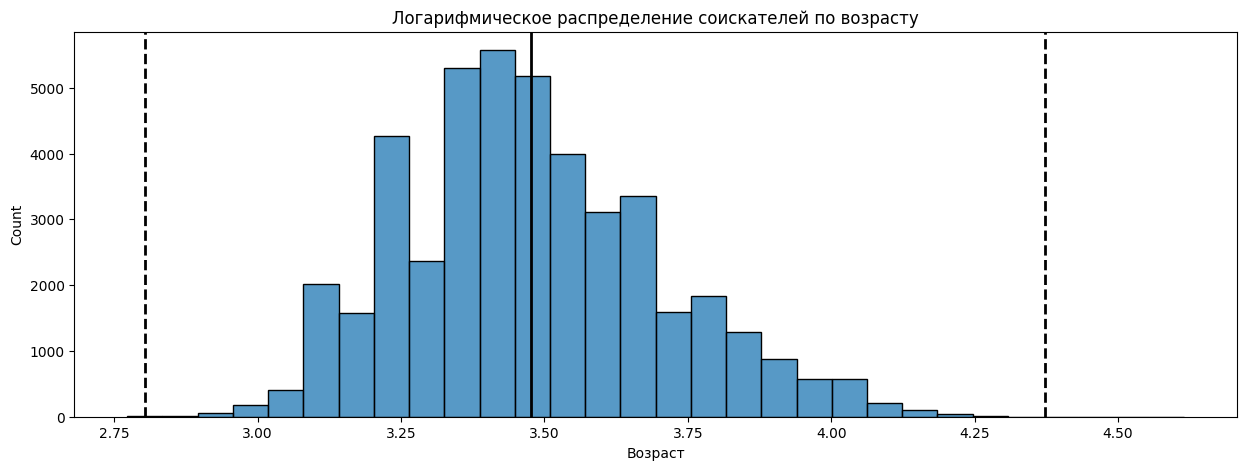

In [53]:
fig, axes = plt.subplots(1, 1, figsize = (15, 5))
log_age = np.log(hh_df['Возраст'] + 1)                                               # логарифмирование признака, содержащего нулевые значения
histplot = sns.histplot(log_age, bins = 30, ax = axes)
histplot.axvline(log_age.mean(), color = "k", lw = 2)                                # построение линии среднего
histplot.axvline(log_age.mean() - 3 * log_age.std(), color = "k", ls = "--", lw = 2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color = "k", ls = "--", lw = 2) # послабление на +1 сигму, правая сигма
histplot.set_title('Логарифмическое распределение соискателей по возрасту');

In [54]:
def outliers_z_score_mod(data, col, left=3, right=3, log_scale=False, log_plus_1=True):
    """ Функция принимает на вход DataFrame и признак, по которому ищутся выбросы, по методу z-отклонения

    Args:
        data (<class 'pandas.core.frame.DataFrame'>): Название DataFrame
        col (str): Название признака, который подвергается анализу и чистке в DataFrame
        left (float): Размах левой границы, соответствует количеству стандартных квадратичных отклонений влево
        right (float): Размах правой границы, соответствует количеству стандартных квадратичных отклонений вправо
        log_scale (bool, optional): Триггер, применение логарифмирования к DataFrame из библиотеки numpy. 
                                    Defaults to False.
        log_plus_1 (bool, optional): Триггер, логарифмирование DataFrame с +1 (при наличия нулевых значений в данных) или 0
                                    Defaults to True.

    Returns:
        <class 'pandas.core.frame.DataFrame'>: возвращает потенциальные выбросы, найденные с помощью метода сигм, 
                                                и очищенный от них датасет
    """
    # проверка включения логарифмического масштаба
    if log_scale:                                                   # логарифмируем, если log_scale=True
        if log_plus_1:                                              # если триггер равен 1,
            x = np.log(data[col] + 1)                               # тогда логарифмируем DataFrame + 1
        else:
            x = np.log(data[col])                                   # иначе логарифмируем DataFrame
    else:
        x = data[col]                                               # иначе, просто задаем DataFrame
    
    # вычисление статистических величин
    miu = x.mean()                                                  # математическое ожидание "мю"
    sigma = x.std()                                                 # стандартное отклонение "сигма"
    
    # определение границ распределения
    lower_bound = miu - left * sigma                                # нижняя граница интервала
    upper_bound = miu + right * sigma                               # верхняя граница интервала
    
    # очистка данных
    outliers = data[(x < lower_bound) | (x > upper_bound)]          # потенциальные выбросы
    cleaned = data[(x > lower_bound) & (x < upper_bound)]           # очищенный DataFrame
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(hh_df, 'Возраст', 3, 4, log_scale=True, log_plus_1=True)
print(f'Число выбросов по z-методу: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

hh_df = cleaned

Число выбросов по z-методу: 3
Результирующее число записей: 44482


In [62]:
# экспортируем полученные данные
hh_df.to_csv('./data/hh_database_clean.csv')

file_old, file_new = './data/dst-3.0_16_1_hh_database.csv', './data/hh_database_clean.csv'
print(f"Занимаемое место обновленной базой меньше в "\
    f"{round(os.path.getsize(file_old) / os.path.getsize(file_new), 2)}"\
    f" раза")

Занимаемое место обновленной базой меньше в 32.1 раза


#### **Выводы:**

1. Справа от моды (самого высокого столбца) наблюдается чуть больше наблюдений, нежели слева - распределение имеет правостороннюю асимметрию.

2. Исходя из полученных данных, под категорию выбросов попадают 3 соискателей:
    * В возрасте 15 лет - 2 человека;
    * В возрасте 100 лет - 1 человек.